Correlação: correspondência entre variáveis.

Regressão: previsões

# Cálculos manuais

Importações

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

Base de dados

In [13]:
tamanho = np.array([30, 39, 49, 60])
preco = np.array([57000, 69000, 77000, 90000])
dataset = pd.DataFrame({'tamanho': tamanho, 'preco': preco})
dataset

,tamanho,preco
0,30,57000
1,39,69000
2,49,77000
3,60,90000


In [15]:
media_tamanho = dataset['tamanho'].mean()
media_preco = dataset['preco'].mean()
media_tamanho, media_preco

(44.5, 73250.0)

In [17]:
dp_tamanho = dataset['tamanho'].std()
dp_preco = dataset['preco'].std()
dp_tamanho, dp_preco

(12.922847983320086, 13865.424623862047)

# Correlação - Manual

In [19]:
dataset['dif'] = (dataset['tamanho'] - media_tamanho) * (dataset['preco'] - media_preco)
dataset

,tamanho,preco,dif
0,30,57000,235625.0
1,39,69000,23375.0
2,49,77000,16875.0
3,60,90000,259625.0


In [20]:
soma_dif = dataset['dif'].sum()
soma_dif

535500.0

In [22]:
covariancia = soma_dif / (len(dataset) - 1)
covariancia

178500.0

In [23]:
coeficiente_correlacao = covariancia / (dp_tamanho * dp_preco)
coeficiente_correlacao

0.9962006267707775

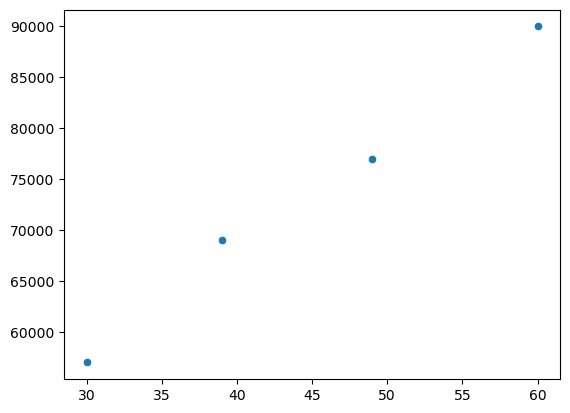

In [26]:
sns.scatterplot(x = tamanho,y = preco);

In [27]:
coeficiente_determinacao = math.pow(coeficiente_correlacao, 2)
coeficiente_determinacao

0.9924156887784898

# Correlação - numpy e pandas

In [28]:
np.cov(tamanho, preco)

array([[1.6700e+02, 1.7850e+05],
       [1.7850e+05, 1.9225e+08]])

In [29]:
dataset.cov()

,tamanho,preco,dif
tamanho,167.0,178500.0,1.850000e+05
preco,178500.0,192250000.0,1.612500e+08
dif,185000.0,161250000.0,1.735512e+10


In [30]:
np.corrcoef(tamanho, preco)

array([[1.        , 0.99620063],
       [0.99620063, 1.        ]])

In [31]:
dataset.corr()

,tamanho,preco,dif
tamanho,1.000000,0.996201,0.108667
preco,0.996201,1.000000,0.088278
dif,0.108667,0.088278,1.000000


## Exercício

In [38]:
dataset = pd.read_csv('house_prices.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [39]:
dataset.drop(labels = ['id','date','sqft_living15', 'sqft_lot15'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [6]:
dataset.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372


<Axes: xlabel='sqft_living', ylabel='price'>

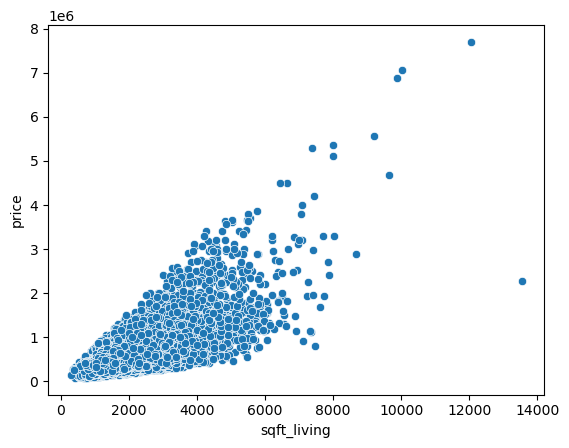

In [7]:
sns.scatterplot(x = dataset['sqft_living'] , y = dataset['price'])

<Axes: xlabel='grade', ylabel='price'>

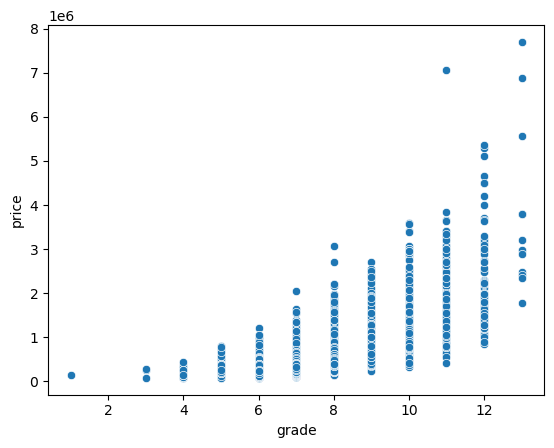

In [8]:
sns.scatterplot(x = dataset['grade'] , y = dataset['price'])

<Axes: xlabel='long', ylabel='price'>

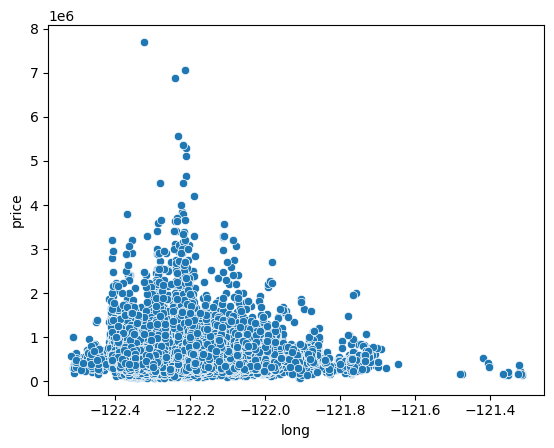

In [9]:
sns.scatterplot(x = dataset['long'] , y = dataset['price'])

<Axes: >

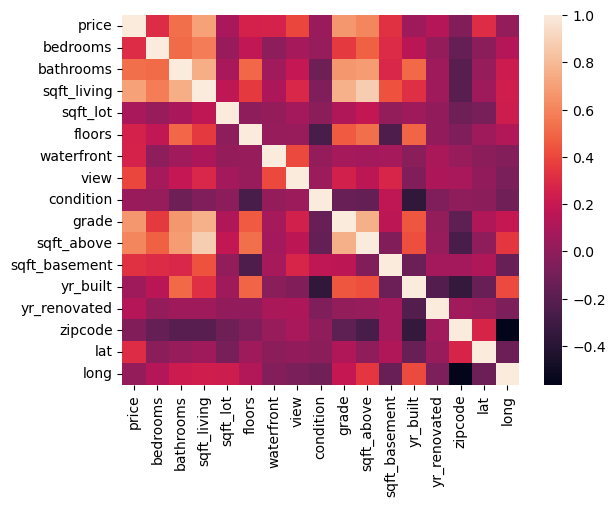

In [11]:
sns.heatmap(dataset.corr())

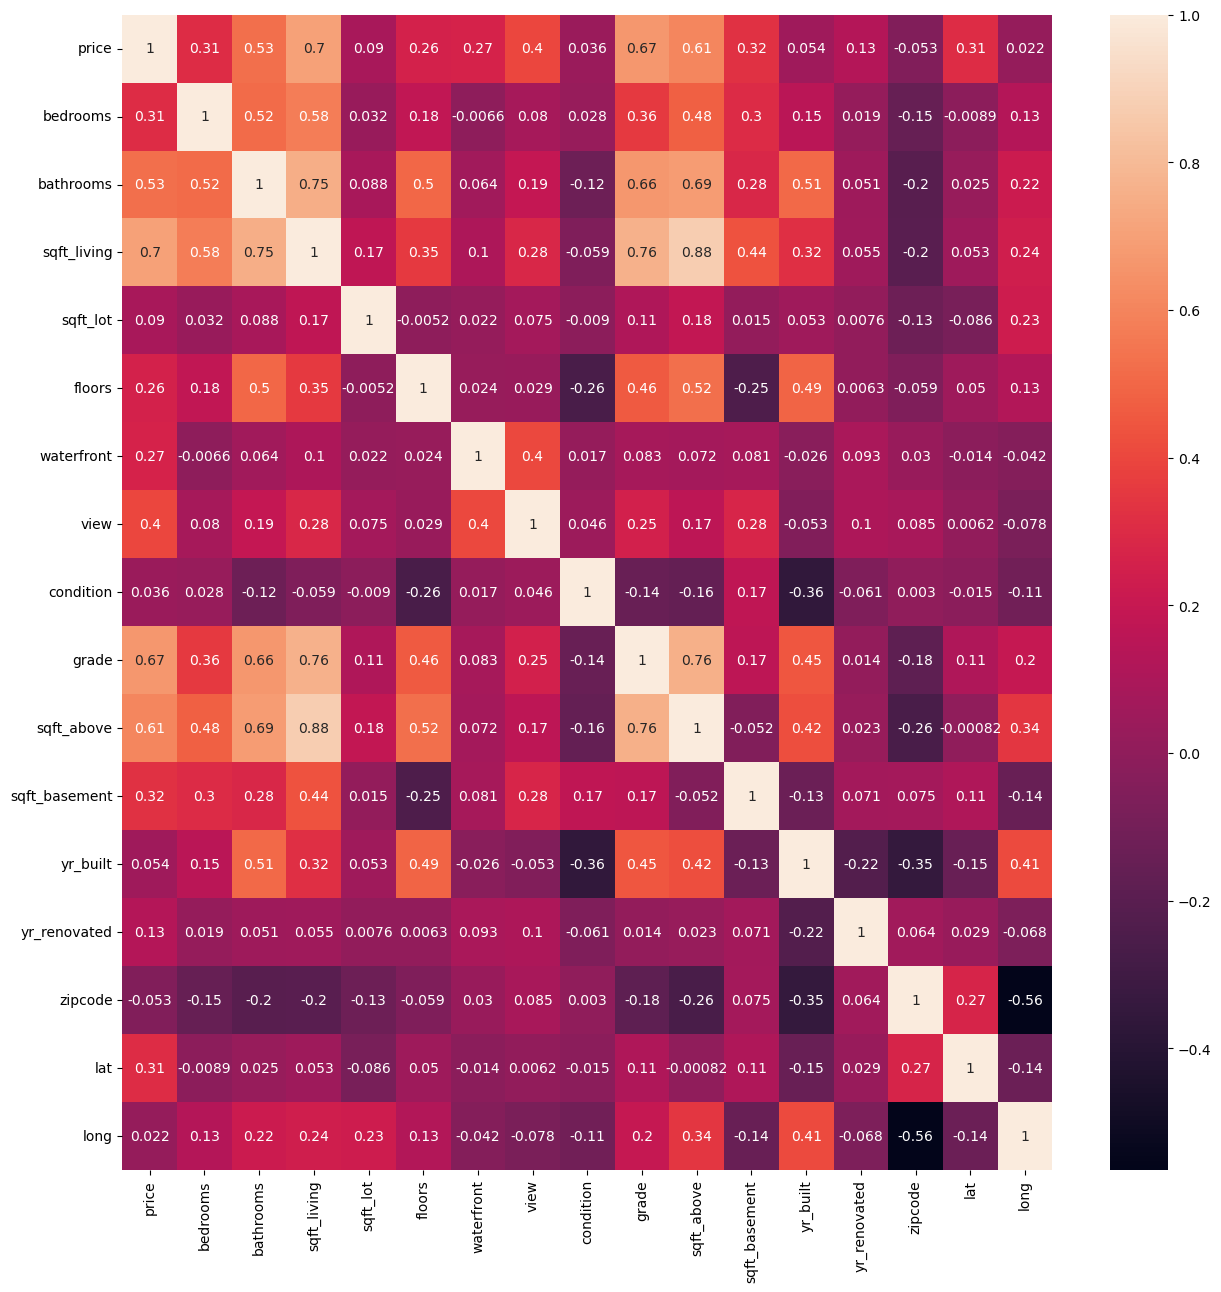

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(dataset.corr(), annot = True)

## Correlação com a biblioteca Yellowbrick 

In [16]:
!pip install yellowbrick --upgrade

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 326.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/282.6 kB 581.0 kB/s eta 0:00:01
   ---------------- --------------------- 122.9/282.6 kB 554.9 kB/s eta 0:00:01
   ------------------------ ------------- 184.3/282.6 kB 740.8 kB/s eta 0:00:01
   --------------------------- ---------- 204.8/282.6 kB 689.9 kB/s eta 0:00:01
   ---------------------------------- --- 256.0/282.6 kB 682.7 kB/s eta 0:00:01
   --------------------------

In [33]:
from yellowbrick.target import FeatureCorrelation

In [41]:
dataset.columns[1:]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

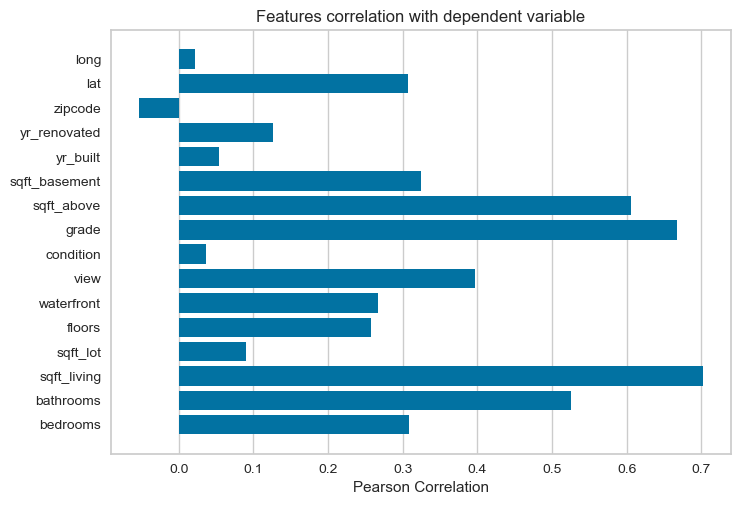

In [42]:
grafico = FeatureCorrelation(labels = dataset.columns[1:])
grafico.fit(dataset.iloc[:,1:].values, dataset.iloc[:, 0].values)
grafico.show();

# Regressão

- Regressão é uma via: sqft_living para prever o preço é diferente de utilizar o preço para prever sqft_living
- Regressão linear: existir linearidade

In [3]:
dataset = pd.read_csv('house_prices.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dataset.drop(labels = ['id','date'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Regressão linear simples

In [5]:
X = dataset['sqft_living'].values
X.shape

(21613,)

In [6]:
X = X.reshape(-1, 1)
X.shape

(21613, 1)

In [7]:
y = dataset['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [8]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento,  y_teste = train_test_split (X, y, test_size = 0.2, random_state = 1)
X_treinamento.shape, X_teste.shape

((17290, 1), (4323, 1))

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression()

In [10]:
#b0 
regressor.intercept_

-30186.36106105463

In [11]:
#b1
regressor.coef_

array([273.82181112])

In [12]:
regressor.predict([[900]])

array([216253.26894848])

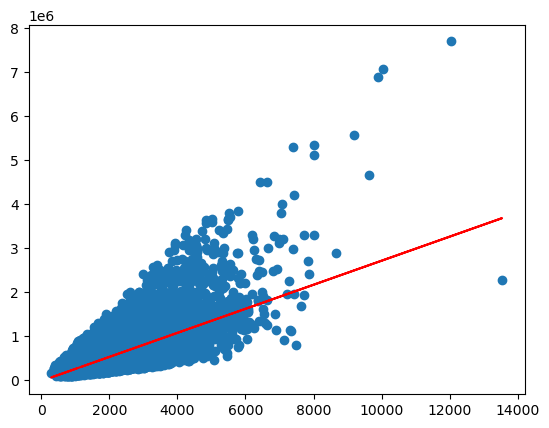

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'red')

In [14]:
regressor.score(X_treinamento, y_treinamento)

0.48876078213887486

In [15]:
regressor.score(X_teste, y_teste)

0.5033019006466926

## Métrica de erros

In [16]:
previsoes = regressor.predict(X_teste)

In [17]:
previsoes, y_teste

(array([ 733776.4919685 ,  416143.19106732,  618771.33129738, ...,
         449001.80840193, 1412854.58355032,  380546.3556215 ]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
mean_absolute_error(y_teste, previsoes)

178578.01159005202

In [20]:
mean_squared_error(y_teste, previsoes)

85730574276.16483

In [21]:
math.sqrt(mean_squared_error(y_teste, previsoes))

292797.83857836935

## Regressão linear múltipla

In [22]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
X = dataset.iloc[:, [2,3,9,10]].values
X

array([[1.00e+00, 1.18e+03, 7.00e+00, 1.18e+03],
       [2.25e+00, 2.57e+03, 7.00e+00, 2.17e+03],
       [1.00e+00, 7.70e+02, 6.00e+00, 7.70e+02],
       ...,
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03],
       [2.50e+00, 1.60e+03, 8.00e+00, 1.60e+03],
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03]])

In [24]:
y = dataset.iloc[:, 0].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

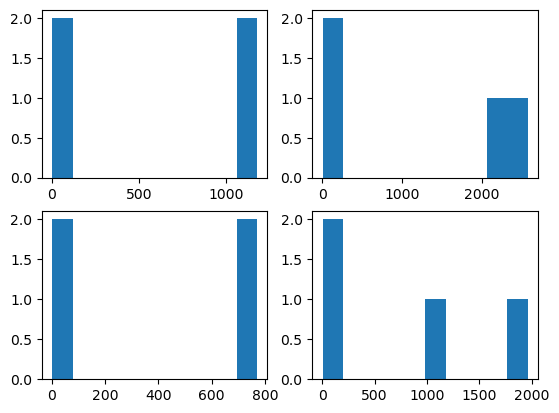

In [25]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(2, 2)
ax[0, 0].hist(X[0])
ax[0, 1].hist(X[1])
ax[1, 0].hist(X[2])
ax[1, 1].hist(X[3]);

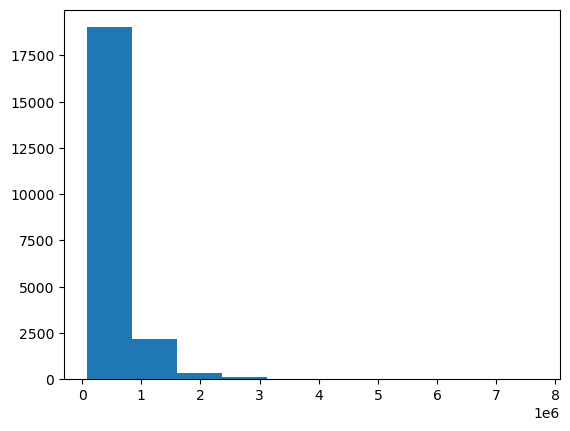

In [26]:
plt.hist(y);

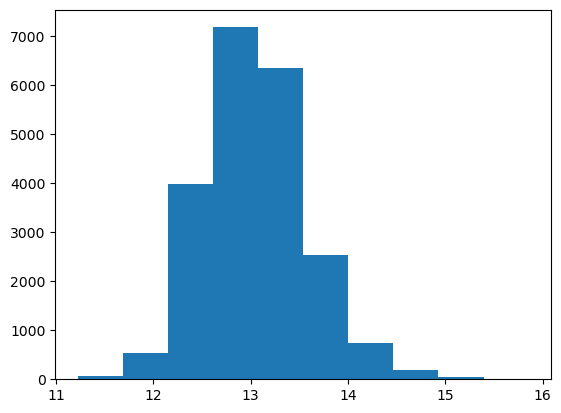

In [27]:
y = np.log(y)
plt.hist(y);

In [28]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_treinamento.shape, X_teste.shape

((17290, 4), (4323, 4))

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento);

In [30]:
regressor.score(X_treinamento, y_treinamento)

0.559462085496587

In [31]:
regressor.score(X_teste, y_teste)

0.5837363233351283

In [32]:
previsoes = regressor.predict(X_teste)
mean_absolute_error(y_teste, previsoes)

0.27631915119456707

## Seleção de atributos

In [41]:
X = dataset.iloc[:,1:17].values
y = dataset.iloc[:,0].values

In [42]:
from sklearn.feature_selection import SelectFdr, f_regression
selecao = SelectFdr(f_regression, alpha = 0.0)
X_novo = selecao.fit_transform(X, y)
X.shape, X_novo.shape

((21613, 16), (21613, 9))

In [43]:
selecao.pvalues_

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 7.97250451e-040,
       1.58101007e-322, 0.00000000e+000, 0.00000000e+000, 8.93565406e-008,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.92987281e-015,
       1.02134789e-077, 5.01105043e-015, 0.00000000e+000, 1.47509222e-003])

In [44]:
colunas = selecao.get_support()
colunas

array([ True,  True,  True, False, False,  True,  True, False,  True,
        True,  True, False, False, False,  True, False])

In [46]:
dataset.columns[1:17][colunas == True]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat'],
      dtype='object')

In [47]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_novo, y, test_size = 0.2, random_state = 1)
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression()

In [48]:
regressor.score(X_treinamento, y_treinamento)

0.6595594252572818

In [49]:
regressor.score(X_teste, y_teste)

0.6445805551620329